# Main differences with rpnpy
## Getting the file information (without data fstprm, with data fstluk)
### Rpnpy - metadata is in a list(dict)

In [2]:
import rpnpy.librmn.all as rmn
unit = rmn.fstopenall('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std')
keys = rmn.fstinl(unit)
records = [rmn.fstprm(k) for k in keys]
rmn.fstcloseall(unit)
for rec in records[0:1]:
    print(rec,end='')

{'key': 1, 'shape': (1108, 1082, 1), 'dateo': 442998800, 'datev': 443004200, 'deet': 300, 'npas': 72, 'ni': 1108, 'nj': 1082, 'nk': 1, 'nbits': 16, 'datyp': 134, 'ip1': 95529009, 'ip2': 6, 'ip3': 0, 'typvar': 'P ', 'nomvar': 'HU  ', 'etiket': 'R1_V710_N   ', 'grtyp': 'Z', 'ig1': 33792, 'ig2': 77761, 'ig3': 1, 'ig4': 0, 'swa': 2335, 'lng': 216286, 'dltf': 0, 'ubc': 0, 'xtra1': 443004200, 'xtra2': 0, 'xtra3': 0}

## Getting the file information (with data as dask lazy arrays, decoded attributes)
### Fstpy - data is in a dataframe

In [3]:
import fstpy.all as fstpy
df = fstpy.StandardFileReader('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std', decode_metadata=True).to_pandas()
df[['nomvar', 'typvar', 'etiket', 'ni', 'nj', 'nk', 'dateo', 'ip1', 'ip2', 'ip3', 'deet', 'npas', 'datyp', 'nbits', 'grtyp', 'ig1', 'ig2', 'ig3', 'ig4', 'datev', 'grid']]


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,>>,X,R1_V710_N,1108,1,1,442998800,33792,77761,1,...,0,5,32,E,1470,560,54400,46560,442998800,3379277761
1,^^,X,R1_V710_N,1,1082,1,442998800,33792,77761,1,...,0,5,32,E,1470,560,54400,46560,442998800,3379277761
2,!!,X,R1_V710_N,3,175,1,0,33792,77761,0,...,0,5,64,X,5005,0,300,1500,0,3379277761
3,PN,P,R1_V710_N,1108,1082,1,442998800,0,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
4,P0,P,R1_V710_N,1108,1082,1,442998800,0,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,QQ,P,R1_V710_N,1107,1081,1,442998800,94498627,6,0,...,72,134,12,Z,50460,53326,4,0,443004200,5046053326
1870,QQ,P,R1_V710_N,1107,1081,1,442998800,96070771,6,0,...,72,134,12,Z,50460,53326,4,0,443004200,5046053326
1871,QQ,P,R1_V710_N,1107,1081,1,442998800,96015143,6,0,...,72,134,12,Z,50460,53326,4,0,443004200,5046053326
1872,QQ,P,R1_V710_N,1107,1081,1,442998800,95286806,6,0,...,72,134,12,Z,50460,53326,4,0,443004200,5046053326


### Already decoded attributes

In [4]:
df[['nomvar', 'typvar', 'run', 'label', 'implementation', 'ni', 'nj', 'nk', 'date_of_observation', 'date_of_validity', 'level', 'ip1_pkind', 'data_type_str', 'nbits', 'unit', 'description', 'vctype']]

,nomvar,typvar,run,label,implementation,ni,nj,nk,date_of_observation,date_of_validity,level,ip1_pkind,data_type_str,nbits,unit,description,vctype
0,>>,X,R1,_V710_,N,1108,1,1,2020-07-14 12:00:00,2020-07-14 12:00:00,0.000000,m,E,32,scalar,Horizontal position in a Y or Z grid,UNKNOWN
1,^^,X,R1,_V710_,N,1,1082,1,2020-07-14 12:00:00,2020-07-14 12:00:00,0.000000,m,E,32,scalar,Vertical position in a Y or Z grid,UNKNOWN
2,!!,X,R1,_V710_,N,3,175,1,NaT,NaT,0.000000,m,E,64,scalar,Vertical coordinate descriptor,UNKNOWN
3,PN,P,R1,_V710_,N,1108,1082,1,2020-07-14 12:00:00,2020-07-14 18:00:00,0.000000,mb,f,12,millibar,Sea Level Pressure,UNKNOWN
4,P0,P,R1,_V710_,N,1108,1082,1,2020-07-14 12:00:00,2020-07-14 18:00:00,0.000000,mb,f,16,millibar,Surface Pressure,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,QQ,P,R1,_V710_,N,1107,1081,1,2020-07-14 12:00:00,2020-07-14 18:00:00,0.126787,hy,f,12,inverseSecond,Absolute Vorticity,UNKNOWN
1870,QQ,P,R1,_V710_,N,1107,1081,1,2020-07-14 12:00:00,2020-07-14 18:00:00,0.065035,hy,f,12,inverseSecond,Absolute Vorticity,UNKNOWN
1871,QQ,P,R1,_V710_,N,1107,1081,1,2020-07-14 12:00:00,2020-07-14 18:00:00,0.059473,hy,f,12,inverseSecond,Absolute Vorticity,UNKNOWN
1872,QQ,P,R1,_V710_,N,1107,1081,1,2020-07-14 12:00:00,2020-07-14 18:00:00,0.914966,hy,f,12,inverseSecond,Absolute Vorticity,UNKNOWN


## Writing to file
### Rpnpy

In [5]:
import rpnpy.librmn.all as rmn
from os import getenv

# setup our output file
user = getenv("USER")
out_file = f'/tmp/{user}/TT.std'
fstpy.delete_file(out_file)

unit1 = rmn.fstopenall('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std', rmn.FST_RO)
unit2 = rmn.fstopenall(out_file, rmn.FST_RW)
keys = rmn.fstinl(unit, nomvar='TT')
for k in keys:
    r = rmn.fstluk(k)
    rmn.fstecr(unit2,r)

rmn.fstcloseall(unit1)
rmn.fstcloseall(unit2)

### Fstpy - no unit management

In [6]:
# setup our output file
out_file = f'/tmp/{user}/TT_fstpy.std'
fstpy.delete_file(out_file)
# read
df = fstpy.StandardFileReader('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std', query='nomvar=="TT"').to_pandas()
# write
fstpy.StandardFileWriter(out_file, df).to_fst()

# Pandas
## Data anlysis

In [7]:
import datetime
import glob
from tqdm import tqdm
import pandas as pd

CMCGRIDF  = '/fs/site3/eccc/ops/cmod/prod/hubs/gridpt/dbase'
fdate     = datetime.date.today().strftime('%Y%m%d') + '**'
pattern  = os.path.join(CMCGRIDF, 'prog', 'regeta', fdate)
files = glob.glob(pattern)

df_list = [fstpy.get_basic_dataframe(f) for f in tqdm(files)]

# create a dataframe of all files
df = pd.concat(df_list, ignore_index=True)

df = fstpy.add_grid_column(df)
df = fstpy.add_columns(df,['ip_info', 'datev'])
tt_surface_df = df.loc[(df.nomvar=='TT') & (df.surface==True)]
tt_surface_df = tt_surface_df.sort_values('date_of_validity').reset_index(drop=True)
tt_surface_df

100%|██████████| 170/170 [00:06<00:00, 26.50it/s]


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,ip2_kind,ip2_pkind,ip3_dec,ip3_kind,ip3_pkind,surface,follow_topography,ascending,interval,vctype
0,TT,P,R1_V710_N,1102,1076,1,453766400,12000,0,0,...,10,H,0.0,10,H,True,True,False,None,ETA
1,TT,P,R1_V710_N,1102,1076,1,453766400,12000,1,0,...,10,H,0.0,10,H,True,True,False,None,ETA
2,TT,P,R1_V710_N,1102,1076,1,453766400,12000,2,0,...,10,H,0.0,10,H,True,True,False,None,ETA
3,TT,P,R1_V710_N,1102,1076,1,453766400,12000,3,0,...,10,H,0.0,10,H,True,True,False,None,ETA
4,TT,P,R1_V710_N,1102,1076,1,453766400,12000,4,0,...,10,H,0.0,10,H,True,True,False,None,ETA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,TT,P,R1_V710_N,1102,1076,1,453771800,12000,80,0,...,10,H,0.0,10,H,True,True,False,None,ETA
166,TT,P,R1_V710_N,1102,1076,1,453771800,12000,81,0,...,10,H,0.0,10,H,True,True,False,None,ETA
167,TT,P,R1_V710_N,1102,1076,1,453771800,12000,82,0,...,10,H,0.0,10,H,True,True,False,None,ETA
168,TT,P,R1_V710_N,1102,1076,1,453771800,12000,83,0,...,10,H,0.0,10,H,True,True,False,None,ETA


## reorganize the data (reads all the TT)

In [8]:
import dask.array as da
tt_surface_df = fstpy.add_dask_column(tt_surface_df)

array_3d = da.stack(tt_surface_df.d)
column = array_3d[:,0,0]
column = column.compute()
orig_tt_df = pd.DataFrame({'TT [C]':column,'date_of_validity':tt_surface_df.date_of_validity})
tt_df = orig_tt_df.set_index('date_of_validity')

## describe the data

In [9]:
print(tt_df.describe())
tt_df['mean'] = tt_df['TT [C]'].mean()
tt_df['min'] = tt_df['TT [C]'].min()
tt_df['max'] = tt_df['TT [C]'].max()
tt_df

           TT [C]
count  170.000000
mean    24.910559
std      0.508008
min     23.239887
25%     24.697980
50%     25.099695
75%     25.262867
max     25.667805


,TT [C],mean,min,max
date_of_validity,,,,
2021-11-25 00:00:00,25.548355,24.910559,23.239887,25.667805
2021-11-25 01:00:00,25.498123,24.910559,23.239887,25.667805
2021-11-25 02:00:00,25.386620,24.910559,23.239887,25.667805
2021-11-25 03:00:00,25.215279,24.910559,23.239887,25.667805
2021-11-25 04:00:00,25.221046,24.910559,23.239887,25.667805
...,...,...,...,...
2021-11-28 14:00:00,25.081326,24.910559,23.239887,25.667805
2021-11-28 15:00:00,25.085289,24.910559,23.239887,25.667805
2021-11-28 16:00:00,25.232994,24.910559,23.239887,25.667805


<AxesSubplot:xlabel='date_of_validity'>

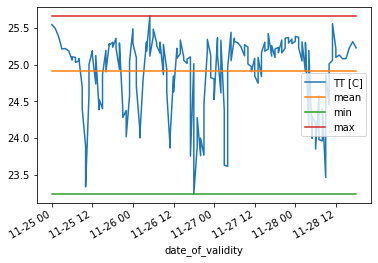

In [10]:
tt_df.plot()

## change the plot

<AxesSubplot:xlabel='TT [C]'>

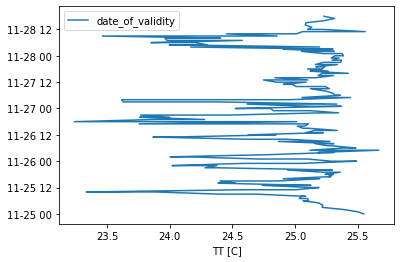

In [11]:
orig_tt_df.set_index('TT [C]').plot()

## TT profile

<AxesSubplot:xlabel='TT'>

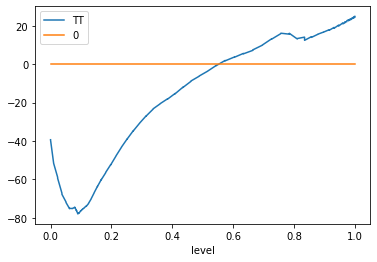

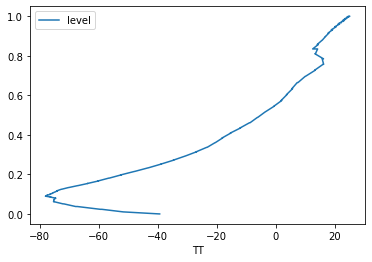

In [16]:
import numpy as np
tt_df = df.loc[(df.nomvar=='TT') & (df.datev==453776300)]
ndf = tt_df.sort_values('level', ascending=False).reset_index(drop=True)
ndf = fstpy.add_dask_column(ndf)
array_3d = da.stack(ndf.d)
column = array_3d[:,0,0]
plt_df = pd.DataFrame({'level':ndf.level,'TT':column,'0':np.zeros(column.shape)})
plt_df.set_index('level').plot()
plt_df.drop('0',axis=1).set_index('TT').plot()


# Sqlite and Pandas

In [17]:
import sqlite3
df = df.drop(['d','shape','interval'], axis=1, errors='ignore')
# connect to a test DB with one three-column table titled "Demo"
cnx = sqlite3.connect(':memory:')
df.to_sql(name='std', con=cnx)
p2 = pd.read_sql('select * from std', cnx)
p2


,index,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,...,ip2_dec,ip2_kind,ip2_pkind,ip3_dec,ip3_kind,ip3_pkind,surface,follow_topography,ascending,vctype
0,0,>>,X,R1_V710_N,1102,1,1,408244400,86086,77806,...,0.0,0,m,0.0,0,m,0,0,1,UNKNOWN
1,1,^^,X,R1_V710_N,1,1076,1,408244400,86086,77806,...,0.0,0,m,0.0,0,m,0,0,1,UNKNOWN
2,2,>>,X,R1_V710_N,1102,1,1,408244400,86086,77806,...,0.0,0,m,0.0,0,m,0,0,1,UNKNOWN
3,3,^^,X,R1_V710_N,1,1076,1,408244400,86086,77806,...,0.0,0,m,0.0,0,m,0,0,1,UNKNOWN
4,4,>>,X,R1_V710_N,1102,1,1,408244400,86086,77806,...,0.0,0,m,0.0,0,m,0,0,1,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206399,206399,K1,P,R1_V710_N,1102,1076,1,453766400,1195,71,...,71.0,10,H,0.0,10,H,0,0,1,UNKNOWN
206400,206400,K1,P,R1_V710_N,1102,1076,1,453766400,1196,71,...,71.0,10,H,0.0,10,H,0,0,1,UNKNOWN
206401,206401,K1,P,R1_V710_N,1102,1076,1,453766400,1197,71,...,71.0,10,H,0.0,10,H,0,0,1,UNKNOWN
206402,206402,K1,P,R1_V710_N,1102,1076,1,453766400,1198,71,...,71.0,10,H,0.0,10,H,0,0,1,UNKNOWN


# Getting and manipulating the meta data

In [18]:
import fstpy.all as fstpy
import pathlib
from datetime import datetime
import numpy as np
import pandas as pd

## Method 1 - to_pandas with explicit instance

In [19]:
std_file = fstpy.StandardFileReader('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std')
df = std_file.to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove('d')
df[cols].head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,HU,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,HU,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,GZ,P,R1_V710_N,1108,1082,1,442998800,95364364,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,GZ,P,R1_V710_N,1108,1082,1,442998800,95357866,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
5,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
6,HR,P,R1_V710_N,1108,1082,1,442998800,94803839,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
7,HR,P,R1_V710_N,1108,1082,1,442998800,94779089,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
8,WE,P,R1_V710_N,1108,1082,1,442998800,94565237,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
9,WE,P,R1_V710_N,1108,1082,1,442998800,94553255,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761


## Method 2 - to_pandas without explicit instance

In [20]:
df = fstpy.StandardFileReader('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std').to_pandas()
# remove d to display otherwise its slow
cols = list(df.columns)
cols.remove('d')
df[cols].head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,HU,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,HU,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,GZ,P,R1_V710_N,1108,1082,1,442998800,95364364,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,GZ,P,R1_V710_N,1108,1082,1,442998800,95357866,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
5,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
6,HR,P,R1_V710_N,1108,1082,1,442998800,94803839,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
7,HR,P,R1_V710_N,1108,1082,1,442998800,94779089,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
8,WE,P,R1_V710_N,1108,1082,1,442998800,94565237,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761
9,WE,P,R1_V710_N,1108,1082,1,442998800,94553255,6,0,...,72,134,12,Z,33792,77761,1,0,443004200,3379277761


# Get a dataframe from multiple standard files

In [21]:
# get files from today
dateTimeObj = datetime.now()
timestamp = dateTimeObj.strftime("%Y%m%d")# (%H:%M:%S.%f)")
timestamp = ''.join([timestamp,'00'])

RDPS_PATH = pathlib.Path('/fs/site3/eccc/ops/cmod/prod/hubs/suites/ops/rdps_20191231/r1/gridpt.usr/prog/eta')
rdps_files = [f for f in RDPS_PATH.iterdir() if f.name.startswith(timestamp)]

# split the results
files = np.array_split(np.array(rdps_files),4)

df = fstpy.StandardFileReader(list(files[0]),decode_metadata=True).to_pandas()
cols = list(df.columns)
cols.remove('d')

# See the contents of the dataframe

## Show the last rows of the dataframe

In [22]:
print(f'number of processed files: {len(list(files[0]))}')
df[cols].tail(10)

number of processed files: 22


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
26698,J8,P,R1_V710_N,1102,1076,1,453766400,1196,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26699,J8,P,R1_V710_N,1102,1076,1,453766400,1197,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26700,J8,P,R1_V710_N,1102,1076,1,453766400,1195,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26701,J8,P,R1_V710_N,1102,1076,1,453766400,1198,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26702,J8,P,R1_V710_N,1102,1076,1,453766400,1199,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26703,K1,P,R1_V710_N,1102,1076,1,453766400,1195,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26704,K1,P,R1_V710_N,1102,1076,1,453766400,1196,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26705,K1,P,R1_V710_N,1102,1076,1,453766400,1197,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26706,K1,P,R1_V710_N,1102,1076,1,453766400,1198,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26707,K1,P,R1_V710_N,1102,1076,1,453766400,1199,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False


## Show column names of the dataframe

In [23]:
df.columns

Index(['nomvar', 'typvar', 'etiket', 'ni', 'nj', 'nk', 'dateo', 'ip1', 'ip2',
       'ip3', 'deet', 'npas', 'datyp', 'nbits', 'grtyp', 'ig1', 'ig2', 'ig3',
       'ig4', 'datev', 'grid', 'd', 'label', 'run', 'implementation',
       'ensemble_member', 'unit', 'description', 'date_of_observation',
       'date_of_validity', 'forecast_hour', 'data_type_str', 'level',
       'ip1_kind', 'ip1_pkind', 'ip2_dec', 'ip2_kind', 'ip2_pkind', 'ip3_dec',
       'ip3_kind', 'ip3_pkind', 'surface', 'follow_topography', 'ascending',
       'interval', 'vctype', 'multiple_modifications', 'zapped', 'filtered',
       'interpolated', 'unit_converted', 'bounded', 'missing_data',
       'ensemble_extra_info'],
      dtype='object')

## Show the levels contained in the dataframe

In [24]:
df.level

0        0.0000
1        0.0000
44       0.0000
45       0.0102
46       0.0233
          ...  
26703    5.0000
26704    4.0000
26705    3.0000
26706    2.0000
26707    1.0000
Name: level, Length: 26666, dtype: float32

## Show the unique levels contained in the dataframe

In [25]:
df.level.unique()

array([0.    , 0.0102, 0.0233, 0.0374, 0.0508, 0.0625, 0.072 , 0.0795,
       0.0852, 0.0897, 0.0941, 0.099 , 0.1044, 0.1104, 0.1172, 0.1248,
       0.1334, 0.1431, 0.1541, 0.1667, 0.1812, 0.1976, 0.2149, 0.2331,
       0.2522, 0.2721, 0.2928, 0.3144, 0.3369, 0.3602, 0.3843, 0.4091,
       0.4348, 0.4612, 0.4883, 0.5161, 0.5446, 0.5737, 0.6034, 0.6337,
       0.6646, 0.6959, 0.7272, 0.7567, 0.7845, 0.8104, 0.8346, 0.8571,
       0.878 , 0.8973, 0.9151, 0.9316, 0.9467, 0.9606, 0.967 , 0.9733,
       0.9792, 0.985 , 0.99  , 0.995 , 0.9975, 1.    , 5.    , 4.    ,
       3.    , 2.    ], dtype=float32)

## Show a subset of columns of the dataframe

In [26]:
df[['nomvar','typvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']]

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3
0,>>,X,R1_V710_N,1102,1,1,408244400,86086,77806,1
1,^^,X,R1_V710_N,1,1076,1,408244400,86086,77806,1
44,TT,P,R1_V710_N,1102,1076,1,453766400,2000,78,0
45,TT,P,R1_V710_N,1102,1076,1,453766400,2102,78,0
46,TT,P,R1_V710_N,1102,1076,1,453766400,2233,78,0
...,...,...,...,...,...,...,...,...,...,...
26703,K1,P,R1_V710_N,1102,1076,1,453766400,1195,51,0
26704,K1,P,R1_V710_N,1102,1076,1,453766400,1196,51,0
26705,K1,P,R1_V710_N,1102,1076,1,453766400,1197,51,0
26706,K1,P,R1_V710_N,1102,1076,1,453766400,1198,51,0


## Show a voir like output of the dataframe

In [27]:
fstpy.voir(df.head(10))


  nomvar typvar     etiket    ni    nj  nk               dateo    ip1    ip2  ip3  deet  npas datyp  nbits grtyp    ig1    ig2    ig3    ig4
0     >>      X  R1_V710_N  1102     1   1 2016-02-17 12:00:00  86086  77806    1     0     0     E     32     E   1470    560  54400  46560
1     TT      P  R1_V710_N  1102  1076   1 2021-11-25 00:00:00   2795     78    0   300   936     f     16     Z  86086  77806      1      0
2     TT      P  R1_V710_N  1102  1076   1 2021-11-25 00:00:00   2720     78    0   300   936     f     16     Z  86086  77806      1      0
3     TT      P  R1_V710_N  1102  1076   1 2021-11-25 00:00:00   2625     78    0   300   936     f     16     Z  86086  77806      1      0
4     TT      P  R1_V710_N  1102  1076   1 2021-11-25 00:00:00   2508     78    0   300   936     f     16     Z  86086  77806      1      0
5     TT      P  R1_V710_N  1102  1076   1 2021-11-25 00:00:00   2374     78    0   300   936     f     16     Z  86086  77806      1      0
6     TT    

# Select sub-sets of data

## Select TT with query method

In [28]:
sel_tt_df = df.query('nomvar=="TT"')
sel_tt_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
44,TT,P,R1_V710_N,1102,1076,1,453766400,2000,78,0,...,None,ETA,False,False,False,False,False,False,False,False
45,TT,P,R1_V710_N,1102,1076,1,453766400,2102,78,0,...,None,ETA,False,False,False,False,False,False,False,False
46,TT,P,R1_V710_N,1102,1076,1,453766400,2233,78,0,...,None,ETA,False,False,False,False,False,False,False,False
47,TT,P,R1_V710_N,1102,1076,1,453766400,2374,78,0,...,None,ETA,False,False,False,False,False,False,False,False
48,TT,P,R1_V710_N,1102,1076,1,453766400,2508,78,0,...,None,ETA,False,False,False,False,False,False,False,False
49,TT,P,R1_V710_N,1102,1076,1,453766400,2625,78,0,...,None,ETA,False,False,False,False,False,False,False,False
50,TT,P,R1_V710_N,1102,1076,1,453766400,2720,78,0,...,None,ETA,False,False,False,False,False,False,False,False
51,TT,P,R1_V710_N,1102,1076,1,453766400,2795,78,0,...,None,ETA,False,False,False,False,False,False,False,False
52,TT,P,R1_V710_N,1102,1076,1,453766400,2852,78,0,...,None,ETA,False,False,False,False,False,False,False,False
53,TT,P,R1_V710_N,1102,1076,1,453766400,2897,78,0,...,None,ETA,False,False,False,False,False,False,False,False


## Select TT with loc method - more efficient

In [29]:
sel_tt_df = df.loc[df.nomvar=="TT"]
sel_tt_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
44,TT,P,R1_V710_N,1102,1076,1,453766400,2000,78,0,...,None,ETA,False,False,False,False,False,False,False,False
45,TT,P,R1_V710_N,1102,1076,1,453766400,2102,78,0,...,None,ETA,False,False,False,False,False,False,False,False
46,TT,P,R1_V710_N,1102,1076,1,453766400,2233,78,0,...,None,ETA,False,False,False,False,False,False,False,False
47,TT,P,R1_V710_N,1102,1076,1,453766400,2374,78,0,...,None,ETA,False,False,False,False,False,False,False,False
48,TT,P,R1_V710_N,1102,1076,1,453766400,2508,78,0,...,None,ETA,False,False,False,False,False,False,False,False
49,TT,P,R1_V710_N,1102,1076,1,453766400,2625,78,0,...,None,ETA,False,False,False,False,False,False,False,False
50,TT,P,R1_V710_N,1102,1076,1,453766400,2720,78,0,...,None,ETA,False,False,False,False,False,False,False,False
51,TT,P,R1_V710_N,1102,1076,1,453766400,2795,78,0,...,None,ETA,False,False,False,False,False,False,False,False
52,TT,P,R1_V710_N,1102,1076,1,453766400,2852,78,0,...,None,ETA,False,False,False,False,False,False,False,False
53,TT,P,R1_V710_N,1102,1076,1,453766400,2897,78,0,...,None,ETA,False,False,False,False,False,False,False,False


## Select multiple fields

In [30]:
sel_uuvv_df = df.loc[df.nomvar.isin(["UU","VV"])]
sel_uuvv_df.head(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
354,UU,P,R1_V710_N,1102,1076,1,453766400,2000,78,0,...,None,ETA,False,False,False,False,False,False,False,False
355,UU,P,R1_V710_N,1102,1076,1,453766400,2102,78,0,...,None,ETA,False,False,False,False,False,False,False,False
356,UU,P,R1_V710_N,1102,1076,1,453766400,2233,78,0,...,None,ETA,False,False,False,False,False,False,False,False
357,UU,P,R1_V710_N,1102,1076,1,453766400,2374,78,0,...,None,ETA,False,False,False,False,False,False,False,False
358,UU,P,R1_V710_N,1102,1076,1,453766400,2508,78,0,...,None,ETA,False,False,False,False,False,False,False,False
359,UU,P,R1_V710_N,1102,1076,1,453766400,2625,78,0,...,None,ETA,False,False,False,False,False,False,False,False
360,UU,P,R1_V710_N,1102,1076,1,453766400,2720,78,0,...,None,ETA,False,False,False,False,False,False,False,False
361,UU,P,R1_V710_N,1102,1076,1,453766400,2795,78,0,...,None,ETA,False,False,False,False,False,False,False,False
362,UU,P,R1_V710_N,1102,1076,1,453766400,2852,78,0,...,None,ETA,False,False,False,False,False,False,False,False
363,UU,P,R1_V710_N,1102,1076,1,453766400,2897,78,0,...,None,ETA,False,False,False,False,False,False,False,False


## Select multiple fields with more than one condition

In [31]:
sel_uuvv6_df = df.loc[(df.nomvar.isin(["UU","VV"])) & (df.ip2==6)]
sel_uuvv6_df.tail(10)

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info


## Selecting by date range

In [32]:
# define a start and end date
start_date = datetime(dateTimeObj.year,dateTimeObj.month,dateTimeObj.day)
end_date = datetime(dateTimeObj.year,dateTimeObj.month,dateTimeObj.day+1,23)
print(f'dates between {start_date} and {end_date}')
df.loc[df.date_of_validity.between(start_date, end_date, inclusive=True)]

dates between 2021-11-25 00:00:00 and 2021-11-26 23:00:00


,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
1099,TT,P,R1_V710_N,1102,1076,1,453766400,2000,8,0,...,None,ETA,False,False,False,False,False,False,False,False
1100,TT,P,R1_V710_N,1102,1076,1,453766400,2102,8,0,...,None,ETA,False,False,False,False,False,False,False,False
1101,TT,P,R1_V710_N,1102,1076,1,453766400,2233,8,0,...,None,ETA,False,False,False,False,False,False,False,False
1102,TT,P,R1_V710_N,1102,1076,1,453766400,2374,8,0,...,None,ETA,False,False,False,False,False,False,False,False
1103,TT,P,R1_V710_N,1102,1076,1,453766400,2508,8,0,...,None,ETA,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26644,K1,P,R1_V710_N,1102,1076,1,453766400,1195,22,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26645,K1,P,R1_V710_N,1102,1076,1,453766400,1196,22,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26646,K1,P,R1_V710_N,1102,1076,1,453766400,1197,22,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26647,K1,P,R1_V710_N,1102,1076,1,453766400,1198,22,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False


# Modify meta data

## Change nomvar from TT to TTI

In [33]:
df.loc[df.nomvar=='TT','nomvar'] = 'TTI'
print(df.loc[df.nomvar=='TTI'])
# rename again
df.loc[df.nomvar=='TTI','nomvar'] = 'TT'

      nomvar typvar     etiket    ni    nj  nk      dateo    ip1  ip2  ip3  \
44       TTI      P  R1_V710_N  1102  1076   1  453766400   2000   78    0   
45       TTI      P  R1_V710_N  1102  1076   1  453766400   2102   78    0   
46       TTI      P  R1_V710_N  1102  1076   1  453766400   2233   78    0   
47       TTI      P  R1_V710_N  1102  1076   1  453766400   2374   78    0   
48       TTI      P  R1_V710_N  1102  1076   1  453766400   2508   78    0   
...      ...    ...        ...   ...   ...  ..        ...    ...  ...  ...   
22256    TTI      P  R1_V710_N  1102  1076   1  453766400  11850   51    0   
22257    TTI      P  R1_V710_N  1102  1076   1  453766400  11900   51    0   
22258    TTI      P  R1_V710_N  1102  1076   1  453766400  11950   51    0   
22259    TTI      P  R1_V710_N  1102  1076   1  453766400  11975   51    0   
22260    TTI      P  R1_V710_N  1102  1076   1  453766400  12000   51    0   

       ...  interval  vctype  multiple_modifications  zapped fi

# Reformatting meta data for other types or structures

## Changind the column names

In [34]:
translation = {'nomvar':'fieldName','etiket':'pdsLabel','dateo':'dateOfObservation'}
new_df = df.rename(columns=translation)
cols = list(new_df.columns)
cols.remove('d')
new_df[cols]

,fieldName,typvar,pdsLabel,ni,nj,nk,dateOfObservation,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
0,>>,X,R1_V710_N,1102,1,1,408244400,86086,77806,1,...,None,UNKNOWN,False,False,False,False,False,False,False,False
1,^^,X,R1_V710_N,1,1076,1,408244400,86086,77806,1,...,None,UNKNOWN,False,False,False,False,False,False,False,False
44,TT,P,R1_V710_N,1102,1076,1,453766400,2000,78,0,...,None,ETA,False,False,False,False,False,False,False,False
45,TT,P,R1_V710_N,1102,1076,1,453766400,2102,78,0,...,None,ETA,False,False,False,False,False,False,False,False
46,TT,P,R1_V710_N,1102,1076,1,453766400,2233,78,0,...,None,ETA,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,K1,P,R1_V710_N,1102,1076,1,453766400,1195,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26704,K1,P,R1_V710_N,1102,1076,1,453766400,1196,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26705,K1,P,R1_V710_N,1102,1076,1,453766400,1197,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False
26706,K1,P,R1_V710_N,1102,1076,1,453766400,1198,51,0,...,None,UNKNOWN,False,False,False,False,False,False,False,False


# Working with data

## Getting the associated data for each record in the dataframe

In [35]:
uu_df = df.loc[(df.nomvar=="UU") & (df.surface==True)]
vv_df = df.loc[(df.nomvar=="VV") & (df.surface==True)]

uu_data_df = fstpy.compute(uu_df)

cols = ['nomvar','ni','nj','nk','dateo','ip1','ip2','ip3','d']

print(uu_data_df[cols])


      nomvar    ni    nj  nk      dateo    ip1  ip2  ip3  \
415       UU  1102  1076   1  453766400  12000   78    0   
1470      UU  1102  1076   1  453766400  12000    8    0   
2525      UU  1102  1076   1  453766400  12000   25    0   
3580      UU  1102  1076   1  453766400  12000   53    0   
4635      UU  1102  1076   1  453766400  12000   20    0   
5690      UU  1102  1076   1  453766400  12000   10    0   
6745      UU  1102  1076   1  453766400  12000    2    0   
7800      UU  1102  1076   1  453766400  12000   31    0   
8855      UU  1102  1076   1  453766400  12000   27    0   
9910      UU  1102  1076   1  453766400  12000   84    0   
10965     UU  1102  1076   1  453766400  12000    1    0   
12020     UU  1102  1076   1  453766400  12000   73    0   
13075     UU  1102  1076   1  453766400  12000   45    0   
14130     UU  1102  1076   1  453766400  12000   47    0   
15185     UU  1102  1076   1  453766400  12000   37    0   
16240     UU  1102  1076   1  453766400 

# Performing simple calculations

## Wind Modulus

### Create a record to hold the result

In [36]:
uv_df = vv_df.copy(deep=True)

### Get a fresh index starting from 0 and change the nomvar accordingly

In [37]:
uv_df = uv_df.reset_index(drop=True)
uv_df.loc[:,'nomvar']='UV'

### Get the first rows for uu and vv

In [38]:
uu = (uu_df.iloc[0]['d'])
vv = (vv_df.iloc[0]['d'])

### The algorithm, after this uv_df contains our result for the wind modulus in knots

In [39]:
uv = (uu**2 + vv**2)**.5
# store the result in the dataframe
uv_df.at[0,'d'] = uv
print('UU\n',uu.compute())
print('VV\n',vv.compute())

UU
 [[-10.729488   -10.6220665  -10.375973   ...  -9.754879    -9.522457
   -9.4189415 ]
 [-10.721676   -10.823238   -10.534176   ...  -9.727535    -9.469723
   -9.313473  ]
 [-11.229488   -11.204098   -10.86816    ...  -9.6845665   -9.4345665
   -9.250973  ]
 ...
 [  1.1650429    0.932621     0.6767616  ... -13.139645   -13.11816
  -13.05566   ]
 [  1.1298866    0.89746475   0.5341835  ... -12.807613   -12.852535
  -13.299801  ]
 [  1.0693398    0.8447304    0.44238663 ... -12.604488   -13.452145
  -13.571285  ]]
VV
 [[ 14.037651    14.29937     14.770073   ... -11.622505   -11.380318
  -11.224068  ]
 [ 14.090385    14.416557    14.897026   ... -11.733833   -11.51899
  -11.33149   ]
 [ 14.088432    14.541557    15.08062    ... -11.788521   -11.626411
  -11.436958  ]
 ...
 [ -0.93891144  -1.0014114   -1.3529739  ...   3.8677292    4.3423386
    4.6353073 ]
 [ -1.1146927   -1.2299271   -1.3881302  ...   3.943901     4.3540573
    4.8403854 ]
 [ -1.3100052   -1.4096146   -1.4486771  ... 

### Visualize dask operations

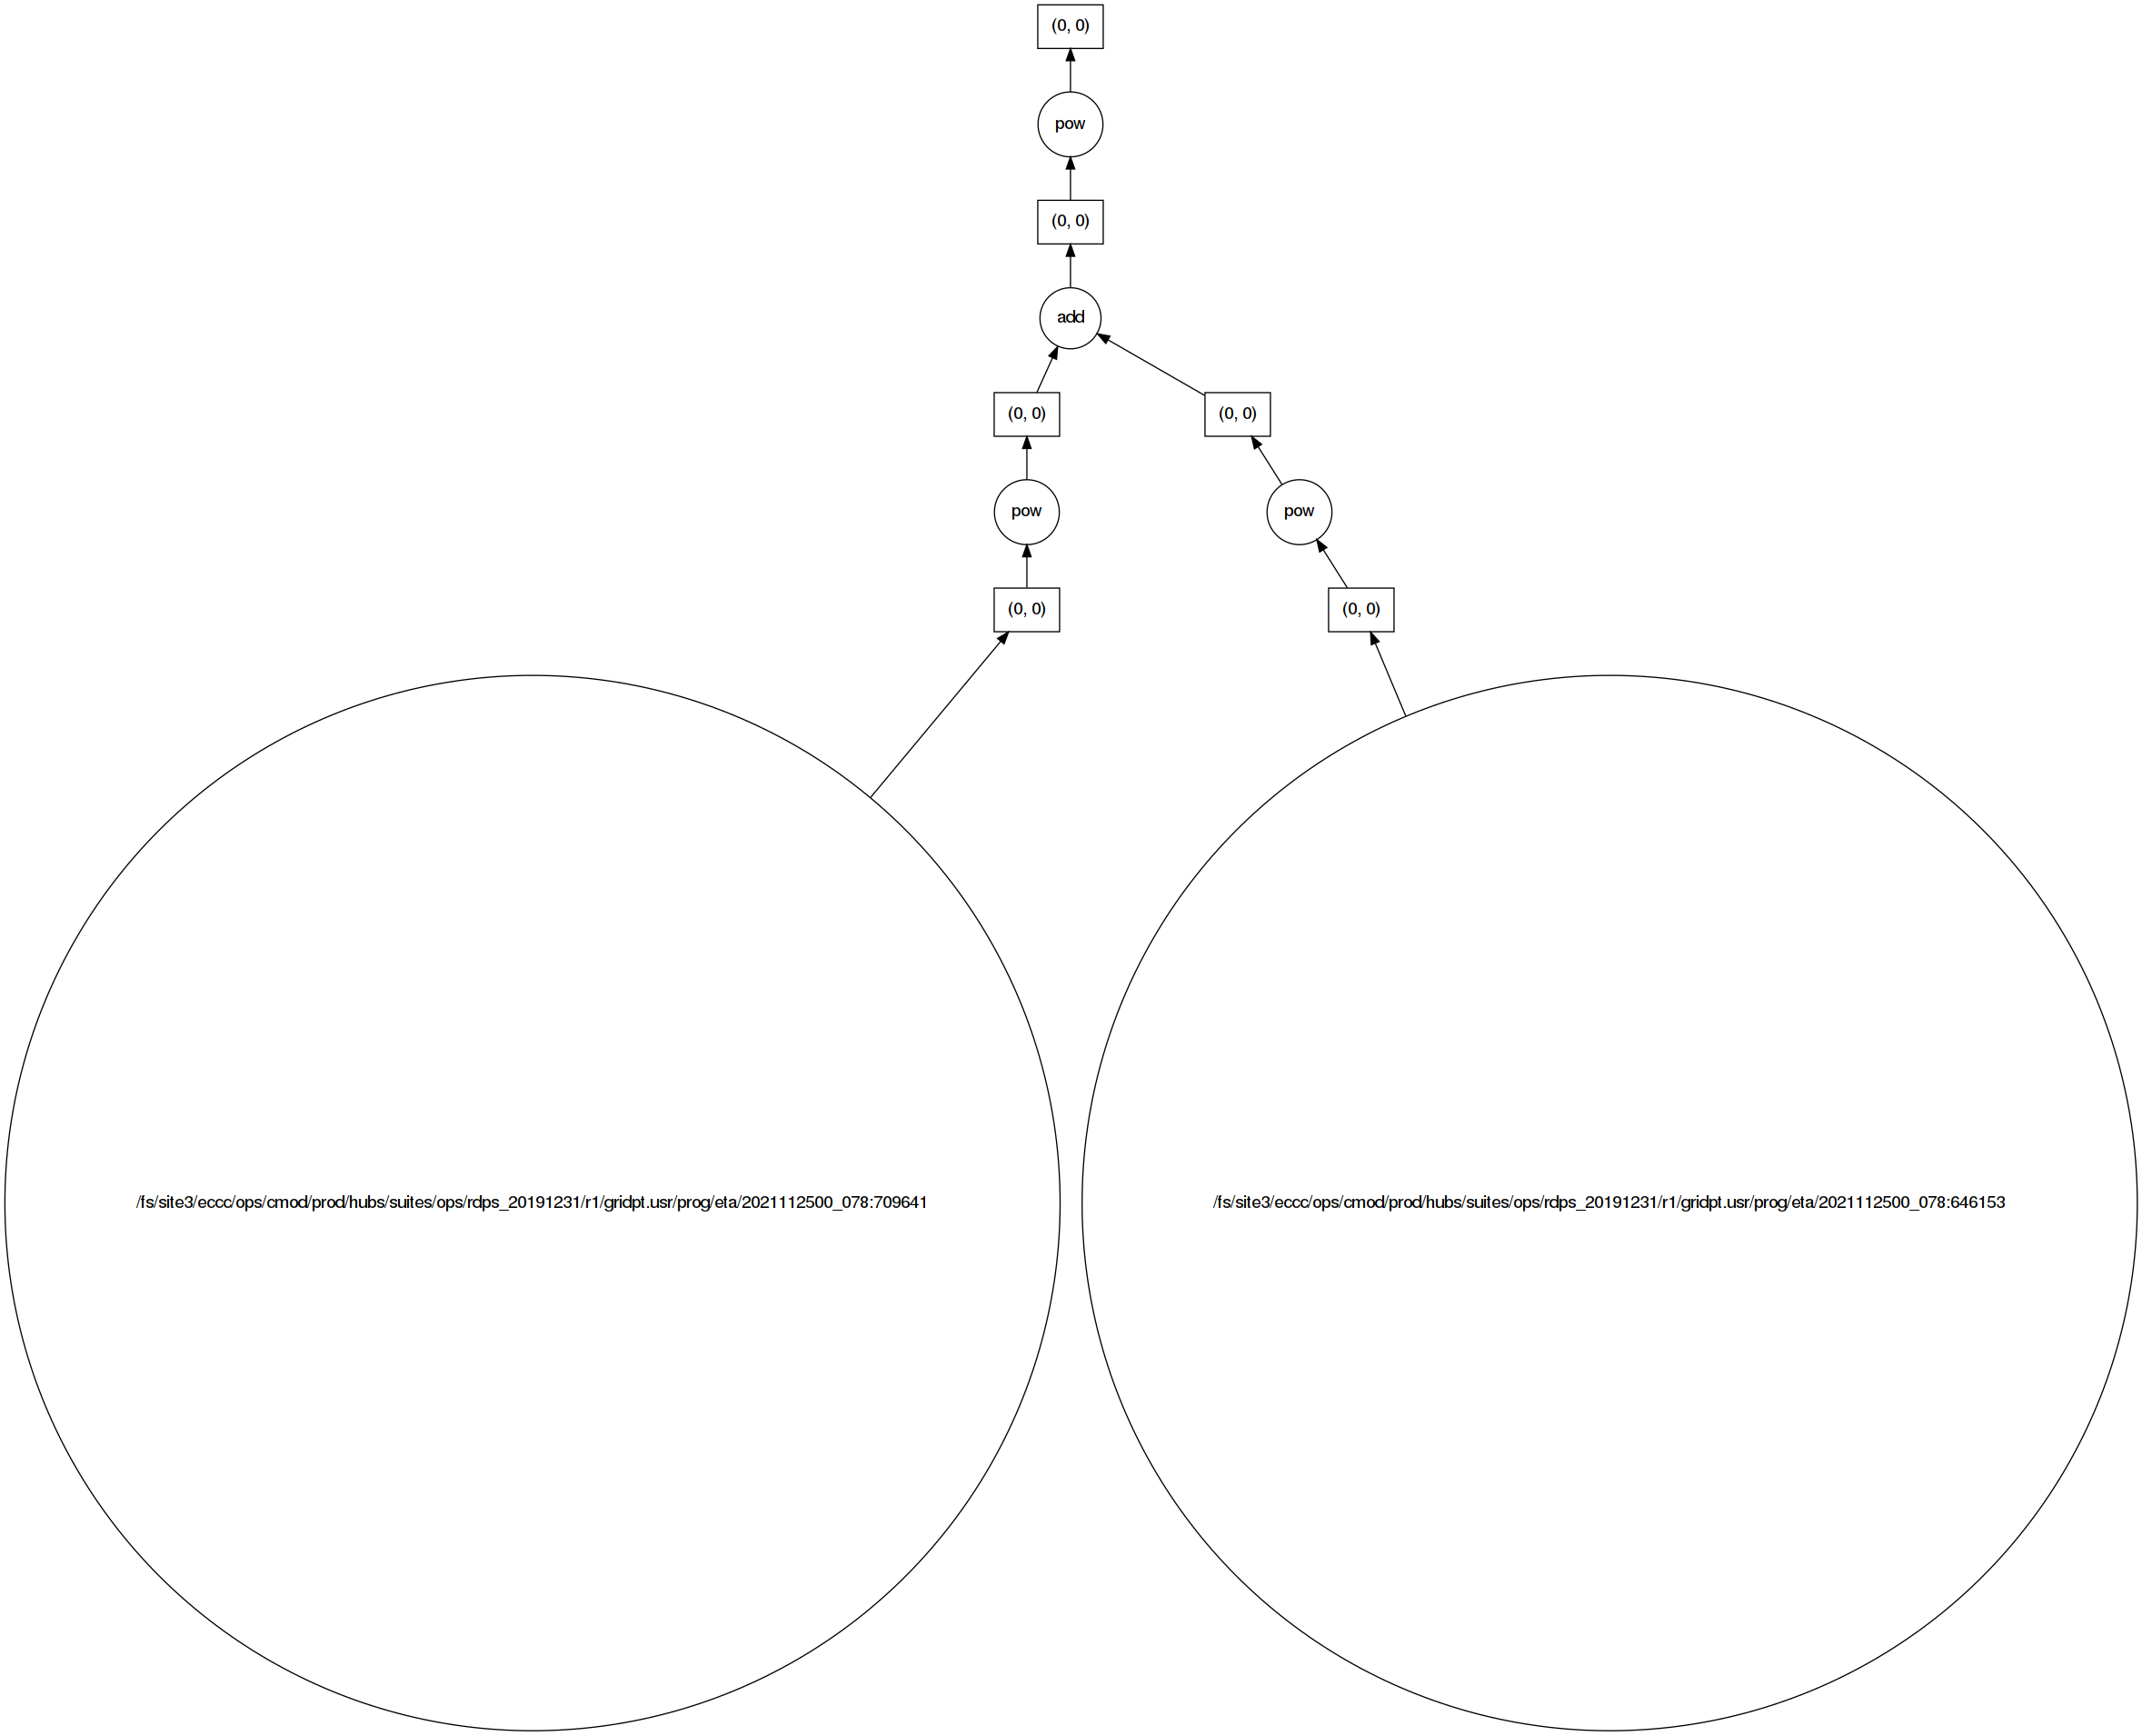

In [40]:
uv_df.iloc[0]['d'].visualize()

In [41]:
print('UV\n',uv_df.iloc[0]['d'].compute())

UV
 [[17.668547  17.812923  18.05037   ... 15.173671  14.83876   14.652514 ]
 [17.705742  18.027191  18.245281  ... 15.241647  14.911833  14.6677685]
 [18.016253  18.357252  18.58876   ... 15.256475  14.972792  14.710014 ]
 ...
 [ 1.4962887  1.3684323  1.5127938 ... 13.697065  13.818178  13.854109 ]
 [ 1.5871936  1.5225517  1.487366  ... 13.4010935 13.570022  14.1532345]
 [ 1.6910355  1.6433449  1.5147182 ... 13.252787  14.279373  14.485646 ]]


In [42]:
# internal structure of the dask array
uv_df.iloc[0]['d']

dask.array<pow, shape=(1102, 1076), dtype=float32, chunksize=(1102, 1076), chunktype=numpy.ndarray>

## Wind Chill

In [43]:
tt_df = df.loc[(df.nomvar=="TT") & (df.surface==True)]

### Create a record to hold wind chill reseult and change the nomvar

In [44]:
re_df = uv_df.copy(deep=True)
re_df['nomvar']='RE'

### The algorithm, after this re_df contains our result for the wind chill

In [45]:
tt = (tt_df.iloc[0]['d'])
uv = (uv_df.iloc[0]['d'])

In [46]:
# if (tt <= 0) & (uv >= 5) then
#    re = 13.12 + 0.6215 * tt + ( 0.3965 * tt - 11.37) * ( uv**0.16 )
# else
#    re = tt
re_df.at[0,'d'] = np.where( (tt <= 0) & (uv >= 5), 13.12 + 0.6215 * tt + ( 0.3965 * tt - 11.37) * ( uv**0.16 ), tt)
print('TT\n',tt.compute())

TT
 [[24.205425  24.297222  24.398785  ...  9.125347   8.988628   8.9280815]
 [24.431988  24.560894  24.625347  ...  9.086285   8.953472   8.879253 ]
 [24.642925  24.730816  24.781597  ...  9.015972   8.902691   8.826519 ]
 ...
 [23.97691   24.209332  24.87144   ...  2.8167534  2.8187065  3.0003471]
 [24.000347  24.248394  24.512066  ...  2.5706596  2.6761284  2.9261284]
 [24.056988  24.160503  24.375347  ...  2.3323784  2.6409721  2.8597221]]


### Visualize dask operations

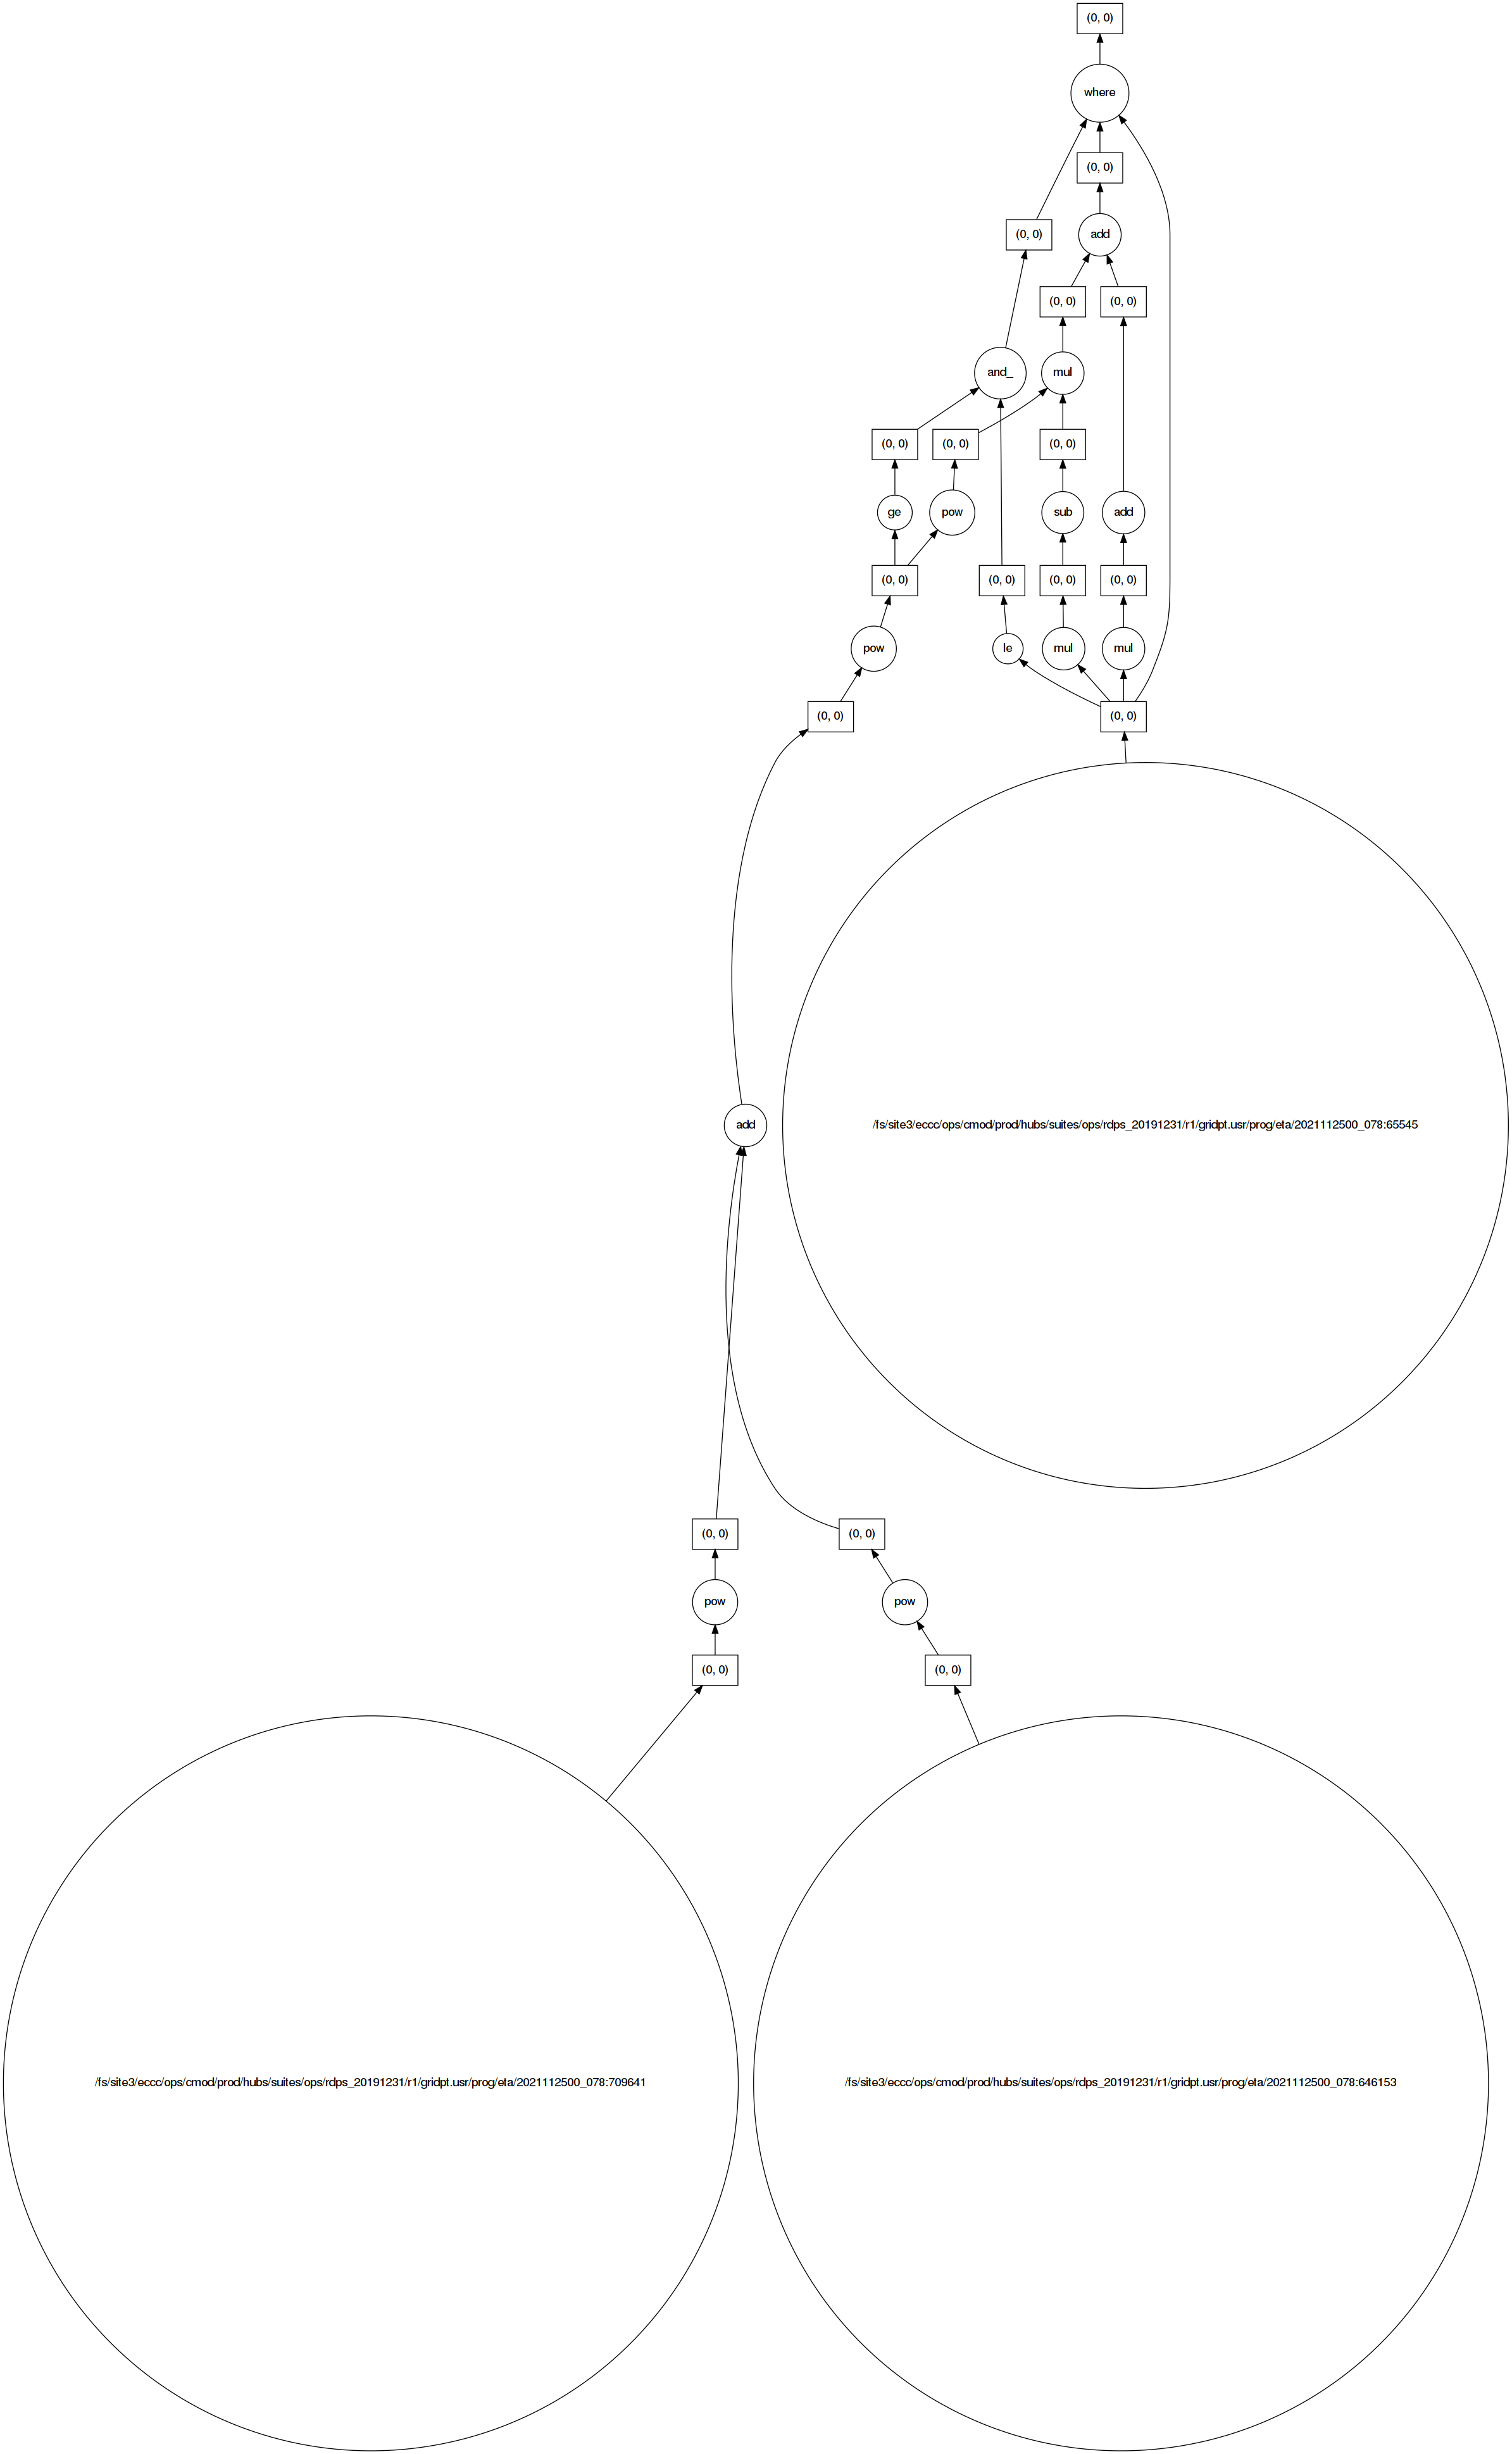

In [47]:
re_df.iloc[0]['d'].visualize()

In [48]:
print('RE\n',re_df.iloc[0]['d'].compute())

RE
 [[24.205425  24.297222  24.398785  ...  9.125347   8.988628   8.9280815]
 [24.431988  24.560894  24.625347  ...  9.086285   8.953472   8.879253 ]
 [24.642925  24.730816  24.781597  ...  9.015972   8.902691   8.826519 ]
 ...
 [23.97691   24.209332  24.87144   ...  2.8167534  2.8187065  3.0003471]
 [24.000347  24.248394  24.512066  ...  2.5706596  2.6761284  2.9261284]
 [24.056988  24.160503  24.375347  ...  2.3323784  2.6409721  2.8597221]]


## Basic statistics for TT records

### Create a function to compute statistics

In [49]:
def compute_basic_stats(df:pd.DataFrame) -> pd.DataFrame:
    """ compute for each row in a datarfame, min, max, mean, standard_deviation and the 2d indice of min and max

    :param df: input dataframe
    :type df: pd.DataFrame
    :return: output dataframe with extra columns
    :rtype: pd.DataFrame
    """
    df = fstpy.compute(df)
    df['min']=None
    df['max']=None
    df['mean']=None
    df['std']=None
    df['min_pos']=None
    df['max_pos']=None
    for i in df.index:
        df.at[i,'mean'] = df.loc[i,'d'].mean()
        df.at[i,'std'] = df.loc[i,'d'].std()
        df.at[i,'min'] = df.loc[i,'d'].min()
        df.at[i,'max'] = df.loc[i,'d'].max()
        # index (i,j) of min in record
        df.at[i,'min_pos'] = np.unravel_index(df.at[i,'d'].argmin(), (df.at[i,'ni'],df.at[i,'nj']))
        df.at[i,'min_pos'] = (df.at[i,'min_pos'][0] + 1, df.at[i,'min_pos'][1]+1)
        # index (i,j) of max in record
        df.at[i,'max_pos'] = np.unravel_index(df.at[i,'d'].argmax(), (df.at[i,'ni'],df.at[i,'nj']))
        df.at[i,'max_pos'] = (df.at[i,'max_pos'][0] + 1, df.at[i,'max_pos'][1]+1)
    return df

In [50]:
new_df = compute_basic_stats(tt_df)
new_df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,unit_converted,bounded,missing_data,ensemble_extra_info,min,max,mean,std,min_pos,max_pos
105,TT,P,R1_V710_N,1102,1076,1,453766400,12000,78,0,...,False,False,False,False,-61.261372,29.935894,4.605759,18.086571,"(699, 779)","(679, 61)"
1160,TT,P,R1_V710_N,1102,1076,1,453766400,12000,8,0,...,False,False,False,False,-54.493355,29.356255,4.775299,17.806488,"(721, 810)","(730, 34)"
2215,TT,P,R1_V710_N,1102,1076,1,453766400,12000,25,0,...,False,False,False,False,-56.393211,30.768898,5.255249,17.766092,"(726, 807)","(755, 48)"
3270,TT,P,R1_V710_N,1102,1076,1,453766400,12000,53,0,...,False,False,False,False,-58.315289,30.481586,4.733705,17.859289,"(698, 780)","(679, 58)"
4325,TT,P,R1_V710_N,1102,1076,1,453766400,12000,20,0,...,False,False,False,False,-56.042484,36.26025,5.734354,17.892,"(718, 801)","(766, 46)"
5380,TT,P,R1_V710_N,1102,1076,1,453766400,12000,10,0,...,False,False,False,False,-54.828716,29.134174,4.680463,17.799458,"(718, 801)","(730, 31)"
6435,TT,P,R1_V710_N,1102,1076,1,453766400,12000,2,0,...,False,False,False,False,-55.642677,30.165916,5.175054,17.794975,"(718, 801)","(679, 67)"
7490,TT,P,R1_V710_N,1102,1076,1,453766400,12000,31,0,...,False,False,False,False,-57.179375,29.277657,4.832576,17.758282,"(726, 807)","(731, 42)"
8545,TT,P,R1_V710_N,1102,1076,1,453766400,12000,27,0,...,False,False,False,False,-56.756306,29.294476,5.088984,17.733181,"(726, 807)","(769, 41)"
9600,TT,P,R1_V710_N,1102,1076,1,453766400,12000,84,0,...,False,False,False,False,-61.315304,29.362431,4.355199,18.113762,"(699, 779)","(730, 30)"


## Basic statistics for each column of 3d matrix

In [52]:
tt3d_df = df.loc[(df.nomvar=='TT') & (df.ip2==np.sort(df.ip2.unique())[0])].reset_index(drop=True)
# sort by level and reset index
tt3d_df = tt3d_df.sort_values(by='level',ascending=tt3d_df.iloc[0]['ascending']).reset_index(drop=True)
tt3d_df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,interval,vctype,multiple_modifications,zapped,filtered,interpolated,unit_converted,bounded,missing_data,ensemble_extra_info
0,TT,P,R1_V710_N,1102,1076,1,453766400,12000,1,0,...,None,ETA,False,False,False,False,False,False,False,False
1,TT,P,R1_V710_N,1102,1076,1,453766400,11975,1,0,...,None,ETA,False,False,False,False,False,False,False,False
2,TT,P,R1_V710_N,1102,1076,1,453766400,11950,1,0,...,None,ETA,False,False,False,False,False,False,False,False
3,TT,P,R1_V710_N,1102,1076,1,453766400,11900,1,0,...,None,ETA,False,False,False,False,False,False,False,False
4,TT,P,R1_V710_N,1102,1076,1,453766400,11850,1,0,...,None,ETA,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,TT,P,R1_V710_N,1102,1076,1,453766400,2508,1,0,...,None,ETA,False,False,False,False,False,False,False,False
58,TT,P,R1_V710_N,1102,1076,1,453766400,2374,1,0,...,None,ETA,False,False,False,False,False,False,False,False
59,TT,P,R1_V710_N,1102,1076,1,453766400,2233,1,0,...,None,ETA,False,False,False,False,False,False,False,False
60,TT,P,R1_V710_N,1102,1076,1,453766400,2102,1,0,...,None,ETA,False,False,False,False,False,False,False,False


### Use an xarray for 3d operations

In [53]:
tt_ds = fstpy.to_cmc_xarray(tt3d_df)
tt_ds

<xarray.Dataset>
Dimensions:  (level: 62, y: 1076, x: 1102)
Coordinates:
  * level    (level) float32 1.0 0.9975 0.995 0.99 ... 0.0374 0.0233 0.0102 0.0
  * y        (y) float32 -48.51 -48.42 -48.33 -48.24 ... 47.97 48.06 48.15 48.24
  * x        (x) float32 126.9 127.0 127.1 127.2 ... 225.7 225.8 225.9 226.0
Data variables:
    TT       (level, x, y) float32 dask.array<chunksize=(1, 1102, 1076), meta=np.ndarray>

In [54]:
tt_ds.TT

<xarray.DataArray 'TT' (level: 62, x: 1102, y: 1076)>
dask.array<stack, shape=(62, 1102, 1076), dtype=float32, chunksize=(1, 1102, 1076), chunktype=numpy.ndarray>
Coordinates:
  * level    (level) float32 1.0 0.9975 0.995 0.99 ... 0.0374 0.0233 0.0102 0.0
  * y        (y) float32 -48.51 -48.42 -48.33 -48.24 ... 47.97 48.06 48.15 48.24
  * x        (x) float32 126.9 127.0 127.1 127.2 ... 225.7 225.8 225.9 226.0

### Compute the stats for each column

In [55]:
tt_min = tt_ds.TT.min(dim='level')
tt_max = tt_ds.TT.max(dim='level')
tt_std = tt_ds.TT.std(dim='level')
tt_mean = tt_ds.TT.mean(dim='level')

### Create containers for our results

In [56]:
# creates a 1 row dataframe based on a model dataframe
def create_result_df(df:pd.DataFrame, nomvar:str, operation_name:str) ->  pd.DataFrame:
   res_df = pd.DataFrame([df.iloc[0].to_dict()])
   res_df['nomvar']=nomvar
   res_df['etiket']=operation_name
   return res_df

min_df = create_result_df(tt_df,'MIN','MINIMUM')
max_df = create_result_df(tt_df,'MAX','MAXIMUM')
std_df = create_result_df(tt_df,'STD','STDDEV')
mean_df = create_result_df(tt_df,'MEAN','AVERAGE')

### Assign resulting arrays to the dataframes

In [57]:
# .at gets the row at index in a dataframe, we have 1 row dataframes in each case and our arrays are simple 2d result arrays 
min_df.at[0,'d'] = tt_min.values
max_df.at[0,'d'] = tt_max.values 
std_df.at[0,'d'] = tt_std.values 
mean_df.at[0,'d'] = tt_mean.values 

### Combine all results into a single dataframe

In [58]:
res_df = pd.concat([min_df,max_df,std_df,mean_df],ignore_index=True)
res_df[['nomvar','etiket','d']]

,nomvar,etiket,d
0,MIN,MINIMUM,"[[-77.590355, -77.61184, -77.64211, -77.681175..."
1,MAX,MAXIMUM,"[[25.498123, 25.49617, 25.486404, 25.46492, 25..."
2,STD,STDDEV,"[[38.425594, 38.433025, 38.439045, 38.441116, ..."
3,MEAN,AVERAGE,"[[-22.433342, -22.434656, -22.436516, -22.4416..."


# Grouping data

## Grouping data by grid, the usual case when you have multiple grids in a dataframe

In [59]:
grid_groups = df.groupby(by=['grid'])

for grid,grid_df in grid_groups:
    print(f'grid: {grid}')
    print(grid_df[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

grid: 8608677806
      nomvar     etiket    ni    nj  nk      dateo    ip1    ip2  ip3
0         >>  R1_V710_N  1102     1   1  408244400  86086  77806    1
1         ^^  R1_V710_N     1  1076   1  408244400  86086  77806    1
44        TT  R1_V710_N  1102  1076   1  453766400   2000     78    0
45        TT  R1_V710_N  1102  1076   1  453766400   2102     78    0
46        TT  R1_V710_N  1102  1076   1  453766400   2233     78    0
...      ...        ...   ...   ...  ..        ...    ...    ...  ...
26703     K1  R1_V710_N  1102  1076   1  453766400   1195     51    0
26704     K1  R1_V710_N  1102  1076   1  453766400   1196     51    0
26705     K1  R1_V710_N  1102  1076   1  453766400   1197     51    0
26706     K1  R1_V710_N  1102  1076   1  453766400   1198     51    0
26707     K1  R1_V710_N  1102  1076   1  453766400   1199     51    0

[26666 rows x 9 columns]


## Grouping data by forecast hour, the usual case when you have multiple forecast hours per grid in a dataframe

In [60]:
forecast_hour_groups = df.loc[df.nomvar=='TT'].groupby(by=['grid','forecast_hour'])

for (grid,fhour),forecast_hour_df in forecast_hour_groups:
    print(f'grid: {grid} forecast_hour: {fhour}')
    print(forecast_hour_df.head(2)[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

grid: 8608677806 forecast_hour: 0 days 01:00:00
      nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
10594     TT  R1_V710_N  1102  1076   1  453766400  2000    1    0
10595     TT  R1_V710_N  1102  1076   1  453766400  2102    1    0
grid: 8608677806 forecast_hour: 0 days 02:00:00
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
6374     TT  R1_V710_N  1102  1076   1  453766400  2000    2    0
6375     TT  R1_V710_N  1102  1076   1  453766400  2102    2    0
grid: 8608677806 forecast_hour: 0 days 08:00:00
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
1099     TT  R1_V710_N  1102  1076   1  453766400  2000    8    0
1100     TT  R1_V710_N  1102  1076   1  453766400  2102    8    0
grid: 8608677806 forecast_hour: 0 days 10:00:00
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
5319     TT  R1_V710_N  1102  1076   1  453766400  2000   10    0
5320     TT  R1_V710_N  1102  1076   1  453766400  2102   10    0
grid: 8608677

## Grouping data by level, the usual case when you have multiple levels per grid in a dataframe

In [61]:
levels_groups = df.loc[df.nomvar=='UU'].groupby(by=['grid','level'])

for (grid,level),level_df in levels_groups:
    print(f'grid: {grid} level: {level}')
    print(level_df.head(2)[['nomvar','etiket','ni','nj','nk','dateo','ip1','ip2','ip3']])

grid: 8608677806 level: 0.0
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
354      UU  R1_V710_N  1102  1076   1  453766400  2000   78    0
1409     UU  R1_V710_N  1102  1076   1  453766400  2000    8    0
grid: 8608677806 level: 0.010200000368058681
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
355      UU  R1_V710_N  1102  1076   1  453766400  2102   78    0
1410     UU  R1_V710_N  1102  1076   1  453766400  2102    8    0
grid: 8608677806 level: 0.02329999953508377
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
356      UU  R1_V710_N  1102  1076   1  453766400  2233   78    0
1411     UU  R1_V710_N  1102  1076   1  453766400  2233    8    0
grid: 8608677806 level: 0.03739999979734421
     nomvar     etiket    ni    nj  nk      dateo   ip1  ip2  ip3
357      UU  R1_V710_N  1102  1076   1  453766400  2374   78    0
1412     UU  R1_V710_N  1102  1076   1  453766400  2374    8    0
grid: 8608677806 level: 0.05079999938607216
   

# Exporting the data

## To standardfile 

In [62]:
from os import getenv
import fstpy.all as fstpy
df = fstpy.StandardFileReader('/fs/site4/eccc/cmd/w/sbf000/fstpy/source_data_5005.std').to_pandas()
tt_df = df.loc[df.nomvar=='TT']
user = getenv("USER")
file = f'/tmp/{user}/TT.std'
fstpy.delete_file(file)
fstpy.StandardFileWriter(file, tt_df).to_fst()

### Check the file

In [63]:
df = fstpy.StandardFileReader(file).to_pandas()
cols = list(df.columns)
cols.remove('d')
df[cols]

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,npas,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TT,P,R1_V710_N,1108,1082,1,442998800,94829605,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
81,TT,P,R1_V710_N,1108,1082,1,442998800,97723494,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
82,TT,P,R1_V710_N,1108,1082,1,442998800,97646024,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761
83,TT,P,R1_V710_N,1108,1082,1,442998800,95223028,6,0,...,72,134,16,Z,33792,77761,1,0,443004200,3379277761


## To pickle

In [64]:
pickle_file = f'/home/{user}/pickle_data.pkl.bz2'
fstpy.delete_file(pickle_file)
df.to_pickle(pickle_file)

### Check the file

In [65]:
df = pd.read_pickle(pickle_file)
df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid,d
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TT,P,R1_V710_N,1108,1082,1,442998800,94829605,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
81,TT,P,R1_V710_N,1108,1082,1,442998800,97723494,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
82,TT,P,R1_V710_N,1108,1082,1,442998800,97646024,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."
83,TT,P,R1_V710_N,1108,1082,1,442998800,95223028,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[dask.array<getitem, shape=(), dtype=float32,..."


In [66]:
df = fstpy.compute(df)
df

,nomvar,typvar,etiket,ni,nj,nk,dateo,ip1,ip2,ip3,...,datyp,nbits,grtyp,ig1,ig2,ig3,ig4,datev,grid,d
0,TT,P,R1_V710_N,1108,1082,1,442998800,76696048,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[26.068878, 26.084503, 26.108917, 26.167511, ..."
1,TT,P,R1_V710_N,1108,1082,1,442998800,95178882,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[15.86026, 15.958893, 16.014557, 16.121979, 1..."
2,TT,P,R1_V710_N,1108,1082,1,442998800,95154915,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[14.96785, 15.049881, 15.1201935, 15.15535, 1..."
3,TT,P,R1_V710_N,1108,1082,1,442998800,95529009,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-43.06671, -43.033997, -43.00226, -42.972473..."
4,TT,P,R1_V710_N,1108,1082,1,442998800,97351772,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-41.939545, -41.942474, -41.94687, -41.95077..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,TT,P,R1_V710_N,1108,1082,1,442998800,94829605,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-6.3888702, -6.367386, -6.3507843, -6.339065..."
81,TT,P,R1_V710_N,1108,1082,1,442998800,97723494,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-27.158905, -27.167206, -27.174042, -27.1794..."
82,TT,P,R1_V710_N,1108,1082,1,442998800,97646024,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[-36.064682, -36.0598, -36.051987, -36.041733..."
83,TT,P,R1_V710_N,1108,1082,1,442998800,95223028,6,0,...,134,16,Z,33792,77761,1,0,443004200,3379277761,"[[15.487396, 15.331146, 14.937592, 14.422943, ..."
